In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
from utils.utils import load_cleaned_data, split, metrics

In [ ]:
def tfidf(X_train, X_test):
    pass

In [14]:
def stylistic_features(cleaned_file):
    stylistic_features = cleaned_file[['uppercase_ratio', 'exclamation_count', 'avg_sentence_length']]
    return stylistic_features

In [15]:
# Use Random Forest Regression for the baseline model
def random_forest(X_train, X_test, y_train):
  model = RandomForestClassifier(n_estimators=100, random_state=0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  return y_pred, y_pred_proba

Random Forest with TF-IDF:
Accuracy: 0.78
Precision: 0.81
Recall: 0.52
F1: 0.63


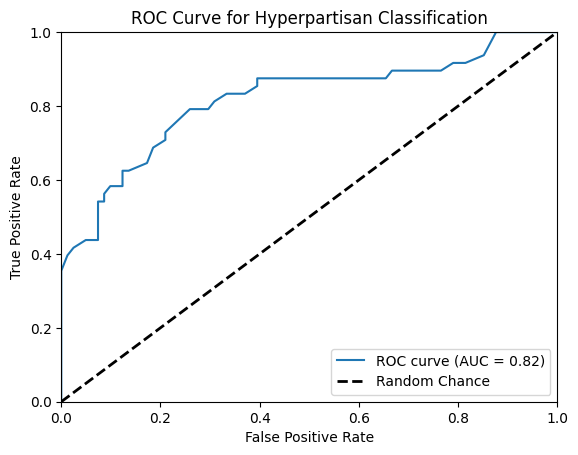

Random Forest with Stylistic Features:
Accuracy: 0.60
Precision: 0.46
Recall: 0.46
F1: 0.46


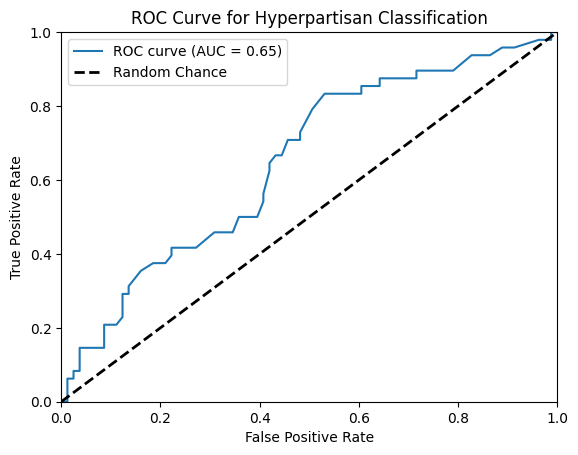

Random Forest with Combined Features:
Accuracy: 0.79
Precision: 0.92
Recall: 0.48
F1: 0.63


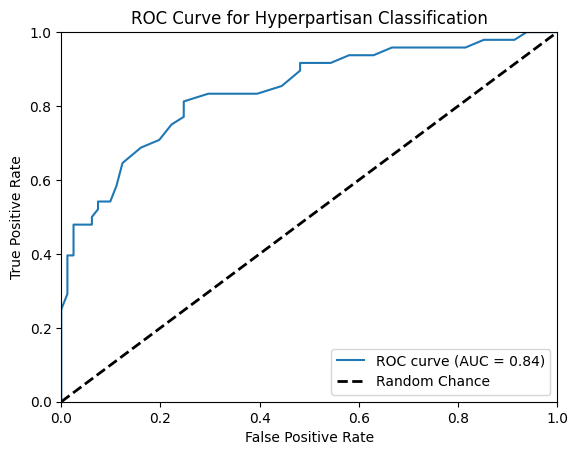

In [ ]:
# load the data
data = load_cleaned_data("data/preprocessed/byarticle_clean.tsv")

X = data['full_text']
y = data['label']

# Split data
X_train, X_test, y_train, y_test = split(X, y)

# Get TF-IDF features
X_train_tfidf, X_test_tfidf = tfidf(X_train, X_test)

# Get stylistic features
X_train_stylistic = stylistic_features(data.loc[X_train.index])
X_test_stylistic = stylistic_features(data.loc[X_test.index])

# Combine TF-IDF and stylistic features
X_train_combined = hstack([X_train_tfidf, X_train_stylistic])
X_test_combined = hstack([X_test_tfidf, X_test_stylistic])

# Run model with TF-IDF features
print("Random Forest with TF-IDF:")
y_pred_tfidf, y_pred_proba_tfidf = random_forest(X_train_tfidf, X_test_tfidf, y_train)
metrics(y_test, y_pred_tfidf, y_pred_proba_tfidf)

# Run model with Stylistic features
print("Random Forest with Stylistic Features:")
y_pred_stylistic, y_pred_proba_stylistic = random_forest(X_train_stylistic, X_test_stylistic, y_train)
metrics(y_test, y_pred_stylistic, y_pred_proba_stylistic)

# Run model with both Stylistic and TF-IDF featuress
print("Random Forest with Combined Features:")
y_pred_combined, y_pred_proba_combined = random_forest(X_train_combined, X_test_combined, y_train)
metrics(y_test, y_pred_combined, y_pred_proba_combined)